This Python 3 environment comes with many helpful analytics libraries installed. It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python. For example, here's several helpful packages to load in:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re 
%matplotlib inline

Input data files are available in the "../input/" directory. For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [2]:
# Assigning the column names of the dataframe
columns = ['user','activity','timestamp', 'xaxis', 'yaxis', 'zaxis']

In [3]:
import os

# Getting the working directory
os.getcwd()

'/Users/jaenagaray/Documents/1 ITS Capstone Project Unit 1152/ITS Capstone Project Unit 1152'

In [4]:
# Setting the working directory
os.chdir('/Users/jaenagaray/Documents/1 ITS Capstone Project Unit 1152/ITS Capstone Project Unit 1152') 

In [5]:
# Getting the working directory
os.getcwd()

'/Users/jaenagaray/Documents/1 ITS Capstone Project Unit 1152/ITS Capstone Project Unit 1152'

In [6]:
# Importing and reading the text dataset
df = pd.read_csv("WISDM_ar_v1.1_raw.txt", 
                 header = None,
                 delimiter=",",
                 names = columns,
                 on_bad_lines='skip')

In [7]:
df.head()

,user,activity,timestamp,xaxis,yaxis,zaxis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;


Data Cleaning

In [8]:
# Removing the Nan values in the dataframe
df=df.dropna()

In [9]:
# Removing the ';' in zaxis. This causes the values to be characters/object
df['zaxis'] = df['zaxis'].str.replace(';', '')

Data Visualization

In [10]:
# Showing the first five rows of the dataframe (overview)
df.head()

,user,activity,timestamp,xaxis,yaxis,zaxis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [11]:
# Shows information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086467 entries, 0 to 1086467
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1086467 non-null  int64  
 1   activity   1086467 non-null  object 
 2   timestamp  1086467 non-null  int64  
 3   xaxis      1086467 non-null  float64
 4   yaxis      1086467 non-null  float64
 5   zaxis      1086467 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 58.0+ MB


In [12]:
# The z axis column is being identified by pandas as an object. This needs to be transform to float.
df['zaxis'] = df['zaxis'].map(lambda x: str(re.findall("\d+\.\d+", str(x))))
df['zaxis'] = df['zaxis'].map(lambda x: x[2:-2])
df['zaxis'] = pd.to_numeric(df['zaxis'],errors='coerce')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082537 entries, 0 to 1086467
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1082537 non-null  int64  
 1   activity   1082537 non-null  object 
 2   timestamp  1082537 non-null  int64  
 3   xaxis      1082537 non-null  float64
 4   yaxis      1082537 non-null  float64
 5   zaxis      1082537 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 57.8+ MB


In [13]:
df['activity'].value_counts()

Walking       416968
Jogging       335342
Upstairs      122378
Downstairs    100085
Sitting        59705
Standing       48059
Name: activity, dtype: int64

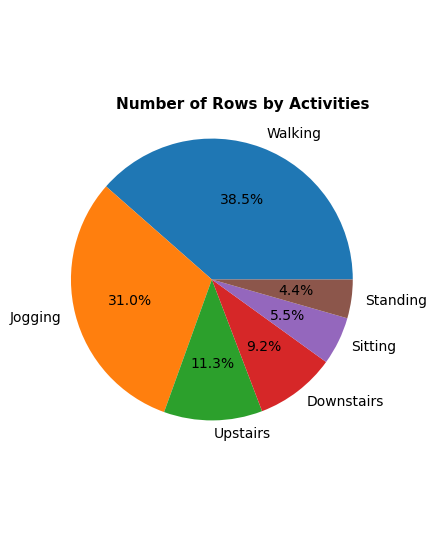

In [14]:
sizes = [416968, 335342, 122378, 100085, 59705, 48059]
labels = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
explode = (0, 0, 0, 0, 0, 0)
textprops = {"fontsize":10}

plt.figure(figsize=(4,7))
plt.pie(sizes, 
        labels=labels, 
        explode=explode, 
        textprops=textprops,
        autopct='%.1f%%')

plt.title('Number of Rows by Activities', 
          x=0.6, 
          y=0.8, 
          fontweight='bold', 
          fontsize=11)

plt.axis('equal')

plt.show()

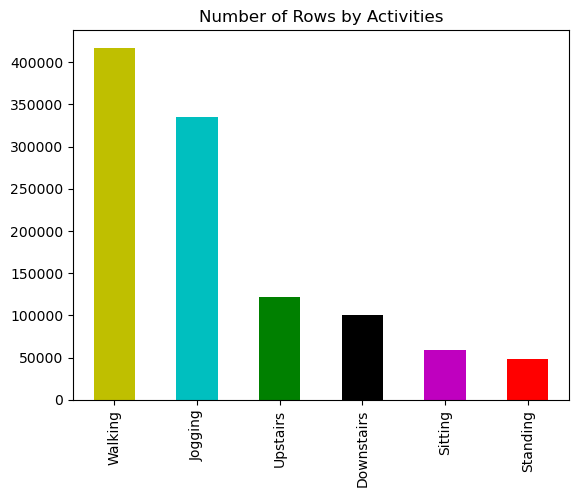

In [15]:
# Checking the distribution of rows per activity
# https://www.kaggle.com/code/adamlouly/exploratory-data-analysis-on-wisdm
df['activity'].value_counts().plot(kind='bar', title='Number of Rows by Activities',
                                   color=['y','c','g','k','m','r']);

In [16]:
sns.set(style='whitegrid', palette='muted', font_scale=0.8)
plt.rcParams["figure.figsize"] = (15,5)

In [17]:
# Viewing the signals trends per activity 
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['xaxis', 'yaxis', 'zaxis']][:500]
    axis = data["xaxis"].plot(subplots=True, 
                     title=activity,color="g")
    axis = data["yaxis"].plot(subplots=True, 
                 title=activity,color="m")
    axis = data["zaxis"].plot(subplots=True, 
             title=activity,color="c")
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

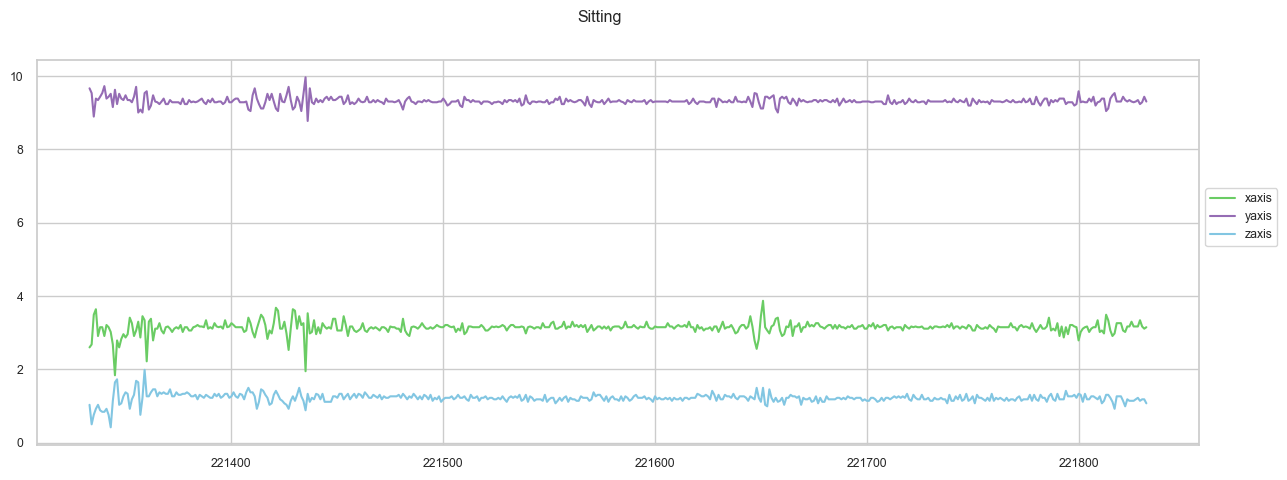

In [18]:
plot_activity("Sitting", df)

Due to the lower frequency of the signals and the sensors are more stable when sitting compared to other activities, the three axes do not intersect during the sitting activity. 

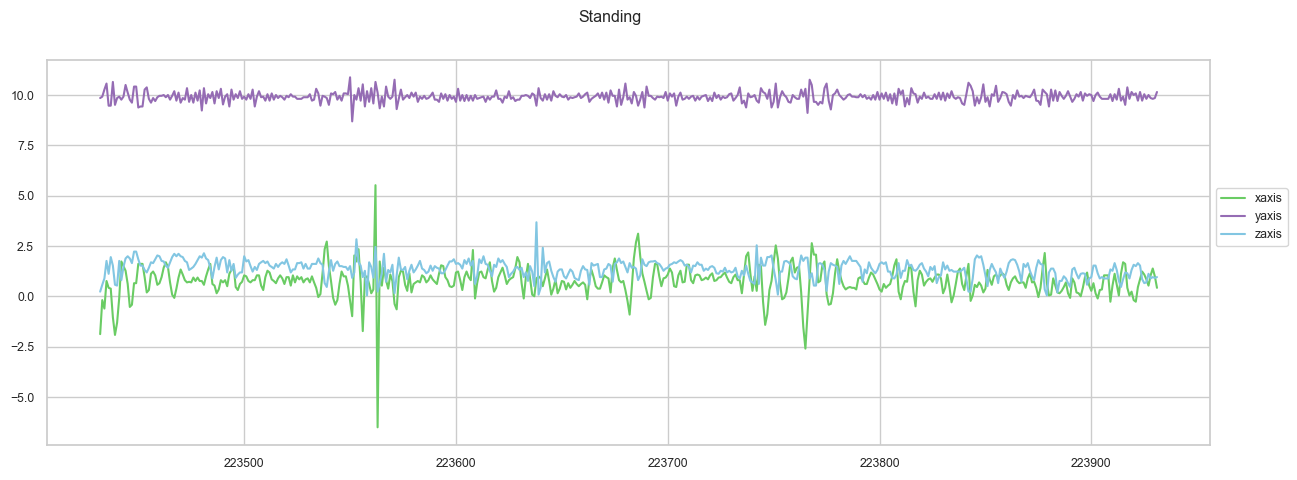

In [19]:
plot_activity("Standing", df)

In contrast to sitting activity, where the sensors tend to be more stable, standing shows that the x and z axes are intersecting, which is a good indicator of the difference between sitting and standing activity.

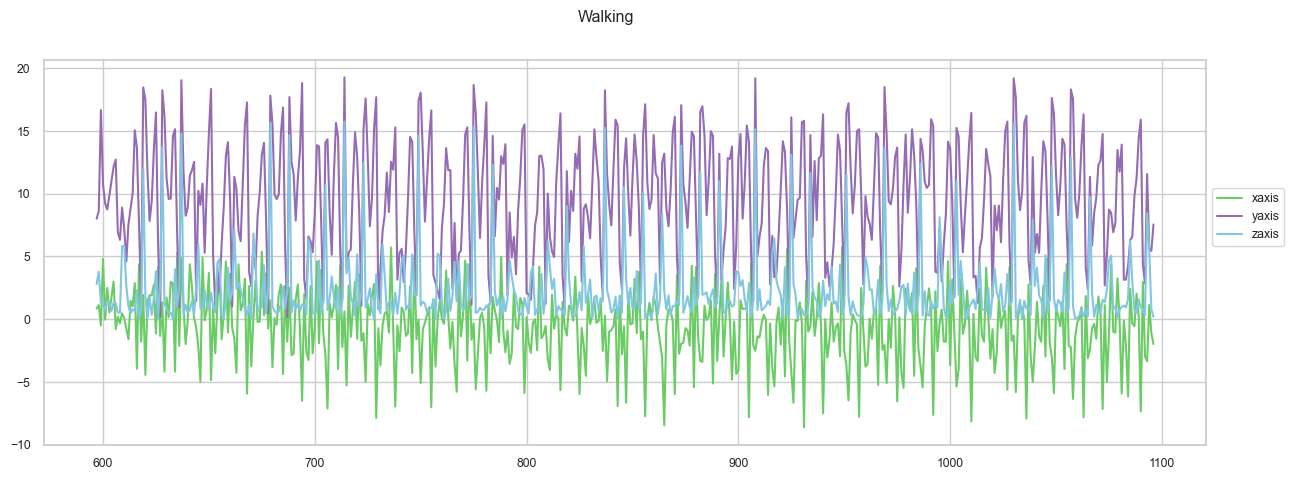

In [20]:
plot_activity("Walking", df)

The walking activity shows erratic movement. This indicates that the sensors are extremely sensitive, which is important because sensors sensitivity provide more accurate descriptions of the activity. The amplitude and wavelength of y axis is wider than compared to the two axes.

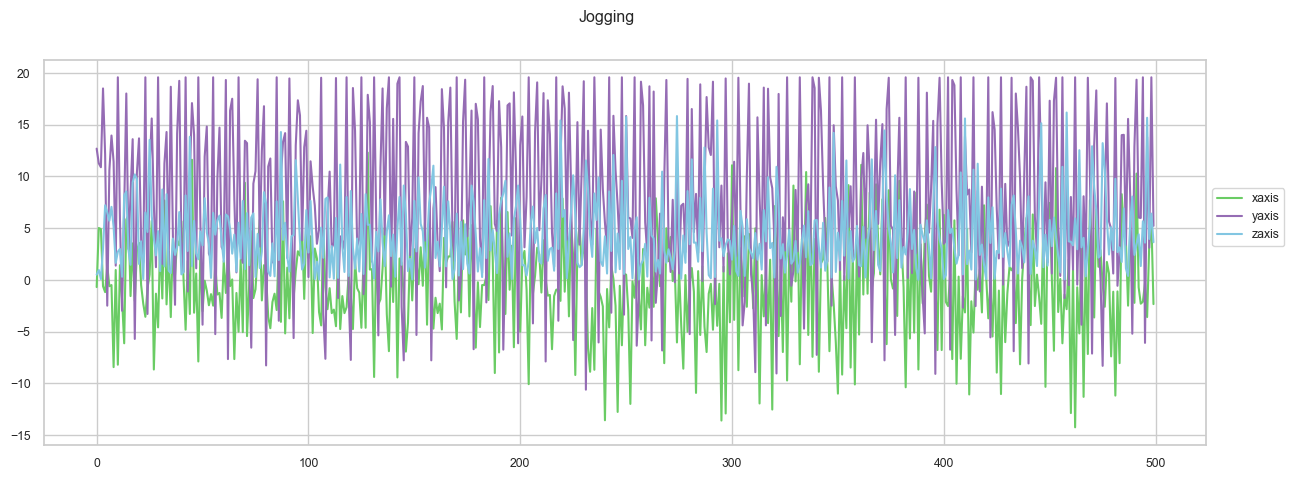

In [21]:
plot_activity("Jogging", df)

The wavelength for jogging is short and the amplitude is longer in comparison to the walking activity. The three axes are intersecting during the whole activity duration indicating that a lot of movement is happening in the walking activity.

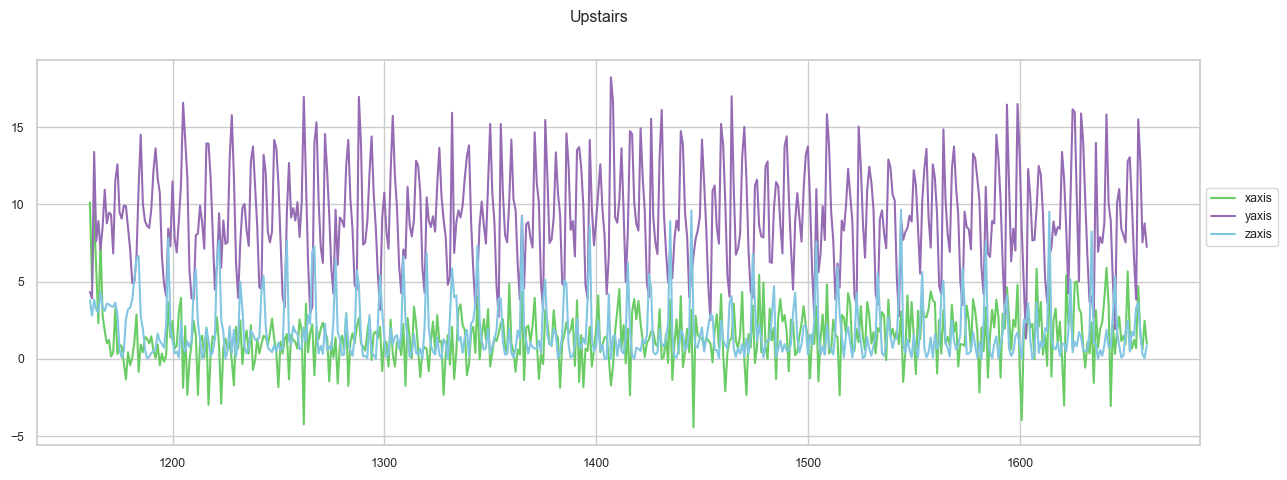

In [22]:
plot_activity("Upstairs", df)

The y axis signal shows is a little far from the other two axes when going upstairs.

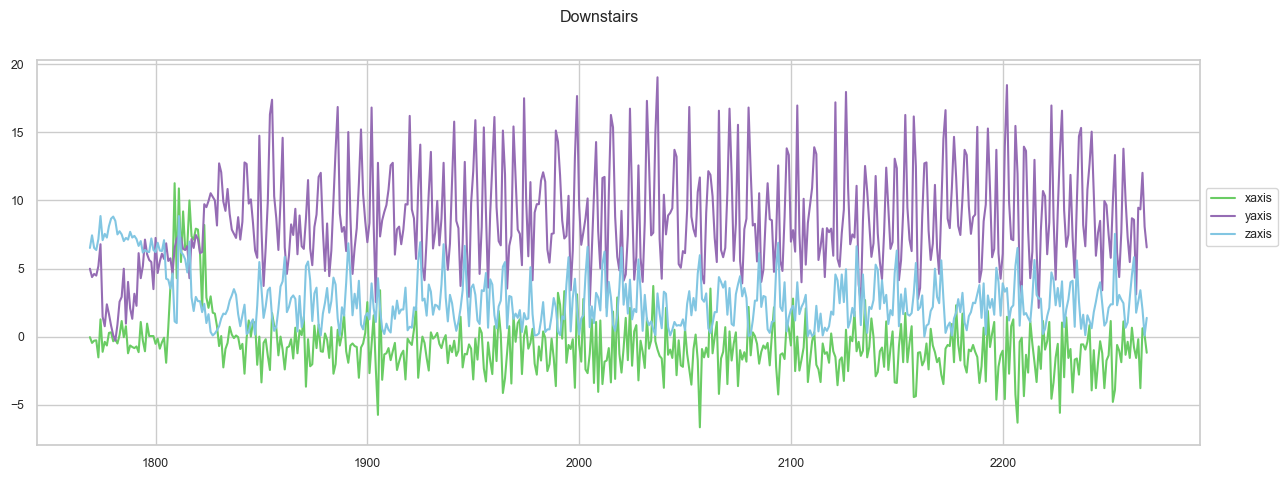

In [23]:
plot_activity("Downstairs", df)

During downstairs activity, the three axis signals are intersecting and movements are also erratic.

In [24]:
# Identifying the column names of the dataframe
df.keys()

Index(['user', 'activity', 'timestamp', 'xaxis', 'yaxis', 'zaxis'], dtype='object')

Machine Learning Modelling

Splitting the feature vectors into a training and testing sets

In [25]:
# Deleting the 'user' column
df.drop('user', axis = 1, inplace = True)

In [26]:
# Deleting the 'timestamp' column
df.drop('timestamp', axis = 1, inplace = True)

In [27]:
# Overview of the first and last lines of 'activity' column
df.activity

0          Jogging
1          Jogging
2          Jogging
3          Jogging
4          Jogging
            ...   
1086463    Sitting
1086464    Sitting
1086465    Sitting
1086466    Sitting
1086467    Sitting
Name: activity, Length: 1082537, dtype: object

In [28]:
# Creating the input variable 
X = df.drop('activity', axis=1)

In [29]:
# Creating the ouput variable 
y = df.activity